In [2]:
# first neural network with keras tutorial
from numpy import loadtxt
from pandas import read_csv
#from pandas import read_
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.models import Model,load_model

In [3]:
# load the dataset
dataset = loadtxt('heart-failure.data.txt', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:12]
y = dataset[:,12]

In [4]:
print(X.shape)
print(y.shape)
print(type(X))

(299, 12)
(299,)
<class 'numpy.ndarray'>


In [8]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
#from keral.optimizer import adam
model.compile(loss='binary_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy
print(model.summary())
plot_model(model, show_shapes=True, to_file='model1.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


param_number = output_channel_number * (input_channel_number + 1)

In [10]:
# fit the keras model on the dataset
history=model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 344.9441 - accuracy: 0.5786
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 197.5426 - accuracy: 0.5819
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 183.4711 - accuracy: 0.6054
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 204.2606 - accuracy: 0.5652
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 210.6524 - accuracy: 0.5686
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 211.5464 - accuracy: 0.5585
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 192.6288 - accuracy: 0.5886
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 254.1757 - accuracy: 0.5084
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 202.0839 - accuracy: 0.5652
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 170.2400 - accura

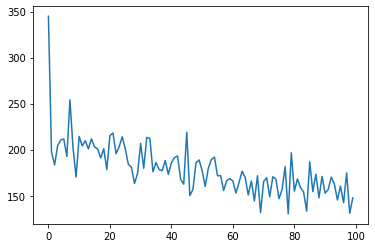

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])

In [18]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 2ms/step - loss: 67.4717 - accuracy: 0.6856
Accuracy: 68.56


In [19]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(10):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0] => 0 (expected 1)
[55.0, 0.0, 7861.0, 0.0, 38.0, 0.0, 263358.03, 1.1, 136.0, 1.0, 0.0, 6.0] => 1 (expected 1)
[65.0, 0.0, 146.0, 0.0, 20.0, 0.0, 162000.0, 1.3, 129.0, 1.0, 1.0, 7.0] => 0 (expected 1)
[50.0, 1.0, 111.0, 0.0, 20.0, 0.0, 210000.0, 1.9, 137.0, 1.0, 0.0, 7.0] => 0 (expected 1)
[65.0, 1.0, 160.0, 1.0, 20.0, 0.0, 327000.0, 2.7, 116.0, 0.0, 0.0, 8.0] => 0 (expected 1)
[90.0, 1.0, 47.0, 0.0, 40.0, 1.0, 204000.0, 2.1, 132.0, 1.0, 1.0, 8.0] => 0 (expected 1)
[75.0, 1.0, 246.0, 0.0, 15.0, 0.0, 127000.0, 1.2, 137.0, 1.0, 0.0, 10.0] => 0 (expected 1)
[60.0, 1.0, 315.0, 1.0, 60.0, 0.0, 454000.0, 1.1, 131.0, 1.0, 1.0, 10.0] => 0 (expected 1)
[65.0, 0.0, 157.0, 0.0, 65.0, 0.0, 263358.03, 1.5, 138.0, 0.0, 0.0, 10.0] => 0 (expected 1)
[80.0, 1.0, 123.0, 0.0, 35.0, 1.0, 388000.0, 9.4, 133.0, 1.0, 1.0, 10.0] => 0 (expected 1)


Epoch 1/100
22/24 [==========================>...] - ETA: 0s - loss: 142.8480 - accuracy: 0.6091
Epoch 00001: val_accuracy improved from -inf to 0.95000, saving model to best_model.h5
24/24 [==============================] - 1s 12ms/step - loss: 149.0356 - accuracy: 0.5941 - val_loss: 28.4896 - val_accuracy: 0.9500
Epoch 2/100
 1/24 [>.............................] - ETA: 0s - loss: 105.1551 - accuracy: 0.7000
Epoch 00002: val_accuracy did not improve from 0.95000
24/24 [==============================] - 0s 3ms/step - loss: 189.0345 - accuracy: 0.4937 - val_loss: 30.0159 - val_accuracy: 0.3500
Epoch 3/100
 1/24 [>.............................] - ETA: 0s - loss: 53.1984 - accuracy: 0.4000
Epoch 00003: val_accuracy did not improve from 0.95000
24/24 [==============================] - 0s 4ms/step - loss: 160.6834 - accuracy: 0.5063 - val_loss: 55.9816 - val_accuracy: 0.9500
Epoch 4/100
23/24 [===========================>..] - ETA: 0s - loss: 178.3103 - accuracy: 0.5609
Epoch 00004: val_ac

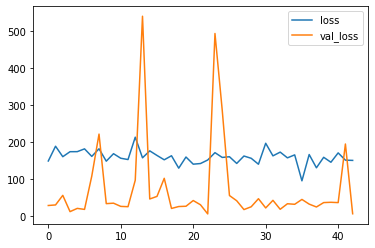

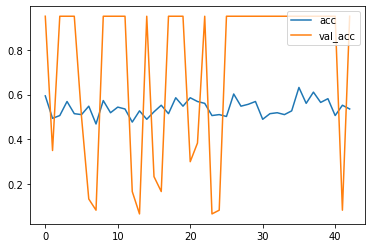

In [20]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X, y, epochs=100, batch_size=10, verbose=1, validation_split=0.2,callbacks=[mc,es]) #validation_data=[test_x, test_y]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'], loc='upper right')

In [21]:
model=load_model('best_model.h5')
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

10/10 [==============================] - 0s 2ms/step - loss: 156.1575 - accuracy: 0.6789
Accuracy: 67.89
[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0] => 0 (expected 1)
[55.0, 0.0, 7861.0, 0.0, 38.0, 0.0, 263358.03, 1.1, 136.0, 1.0, 0.0, 6.0] => 0 (expected 1)
[65.0, 0.0, 146.0, 0.0, 20.0, 0.0, 162000.0, 1.3, 129.0, 1.0, 1.0, 7.0] => 0 (expected 1)
[50.0, 1.0, 111.0, 0.0, 20.0, 0.0, 210000.0, 1.9, 137.0, 1.0, 0.0, 7.0] => 0 (expected 1)
[65.0, 1.0, 160.0, 1.0, 20.0, 0.0, 327000.0, 2.7, 116.0, 0.0, 0.0, 8.0] => 0 (expected 1)
